In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [2]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

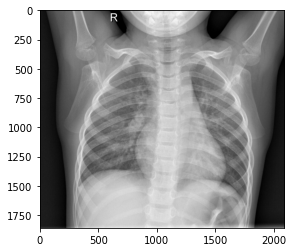

In [3]:
#within the train dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_train, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

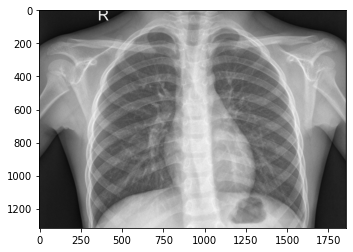

In [4]:
#within the test dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_test, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

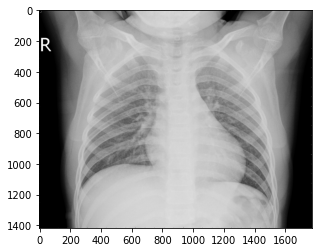

In [5]:
#within the validate dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_validate, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

# Data Augmentation

In [6]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(512, 512), 
        batch_size = 5216, 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [7]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(512, 512), 
        batch_size = 624, 
        seed = 123,
        class_mode="binary") 

Found 624 images belonging to 2 classes.


In [8]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(512, 512), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary") 

Found 16 images belonging to 2 classes.


In [9]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

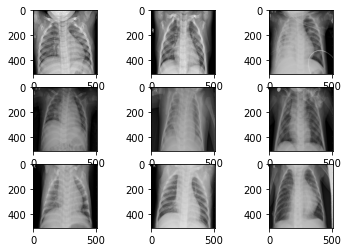

In [10]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
plt.show()

# Modeling

In [11]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

# Modeling

## Model One - CNN 

From a different notebook, different image size used

In [16]:
# cnn_one = models.load_model('CNN.h5')

In [17]:
# cnn_one.evaluate(X_test, y_test)

## Model Two - CNN

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc'])

cnn1 = cnn.fit(X_train,
                y_train,
                epochs=5,
                batch_size=50,
                validation_data=(X_val, y_val))

Epoch 1/5
 86/105 [=======================>......] - ETA: 4:41 - loss: 11.8178 - acc: 0.6868

In [ ]:
cnn.save('CNN_two.h5')

In [ ]:
cnn.summary()

In [67]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

20/20 [==============================] - 13s 662ms/step - loss: 0.4999 - acc: 0.7901
[0.1391398012638092, 0.9484279155731201] [0.499891072511673, 0.7900640964508057]


## Model 3 - Also CNN

In [93]:
tic = time.time()
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.002),
              metrics=['acc'])

In [ ]:
cnn1 = cnn.fit(X_train,
                y_train,
                epochs=9,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/9
209/209 [==============================] - 327s 2s/step - loss: 0.6726 - acc: 0.7425 - val_loss: 1.0103 - val_acc: 0.6250
Epoch 2/9
209/209 [==============================] - 337s 2s/step - loss: 0.1408 - acc: 0.9429 - val_loss: 0.0578 - val_acc: 1.0000
Epoch 3/9
209/209 [==============================] - 326s 2s/step - loss: 0.0893 - acc: 0.9682 - val_loss: 0.1198 - val_acc: 0.9375
Epoch 4/9
209/209 [==============================] - 362s 2s/step - loss: 0.0673 - acc: 0.9722 - val_loss: 0.0948 - val_acc: 0.9375
Epoch 5/9
209/209 [==============================] - 419s 2s/step - loss: 0.0551 - acc: 0.9793 - val_loss: 0.0389 - val_acc: 1.0000
Epoch 6/9
209/209 [==============================] - 404s 2s/step - loss: 0.0563 - acc: 0.9793 - val_loss: 0.1175 - val_acc: 0.9375
Epoch 7/9
209/209 [==============================] - 426s 2s/step - loss: 0.1380 - acc: 0.9518 - val_loss: 0.3282 - val_acc: 0.8750
Epoch 8/9
 42/209 [=====>........................] - ETA: 5:26 - loss: 0.045

In [ ]:
cnn.save('CNN_three.h5')

## Model 4 - CNN

In [ ]:
tic = time.time()
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn2.add(layers.Dropout(.5))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.002),
              metrics=['acc', 'Recall', 'AUC'])

In [ ]:
cnn1 = cnn.fit(X_train,
                y_train,
                epochs=5,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

In [ ]:
cnn.save('CNN_four.h5')

## Model 5

In [ ]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [ ]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(1,activation='sigmoid')) #final layer with sigmoid activation

In [ ]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

In [ ]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

In [ ]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [ ]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

In [ ]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(X_train,
          y_train,
          epochs=6,
          batch_size=32,
          validation_data=(X_val, y_val))

In [ ]:
model.save('transferlearning')

In [ ]:
new_model.evaluate(X_test, y_test)

In [ ]:
predictions_transfer = new_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

## Additional Data Augmentation

In [ ]:
data_train = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_train, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

In [ ]:
data_test = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_test, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

In [ ]:
data_val = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_validate, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 